In [1]:
import pandas as pd
import numpy as np


In [2]:
# Loading the Data set
df = pd.read_csv('DataAnalys_jobmarket_UAE.csv')

In [3]:
df.head(2)

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,Skills Required
0,Data Analyst,Etisalat,Abu Dhabi,3,10000,15000,"SQL, Python, Tableau, Data analysis, report..."
1,Senior Data Analyst,Emirates Airlines,Dubai,5,18000,25000,"Advanced SQL, R, Power BI, Predictive modeli..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            917 non-null    object
 1   Company          917 non-null    object
 2   Location         917 non-null    object
 3   MIN_Experience   917 non-null    int64 
 4   MIN_Salary       917 non-null    int64 
 5   MAX_Salary       917 non-null    int64 
 6   Skills Required  917 non-null    object
dtypes: int64(3), object(4)
memory usage: 50.3+ KB


In [5]:
# 2. Handle missing values
df.replace('', np.nan, inplace=True)  # Replace empty strings with NaN
df.dropna(inplace=True)  # Remove rows with missing values

In [6]:
# 3. Clean text data
df['Title'] = df['Title'].str.lower().str.strip()
df['Company'] = df['Company'].str.lower().str.strip()
df['Location'] = df['Location'].str.lower().str.strip()
df['Skills Required'] = df['Skills Required'].str.lower().str.strip()

In [7]:
df.head()

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,Skills Required
0,data analyst,etisalat,abu dhabi,3,10000,15000,"sql, python, tableau, data analysis, report..."
1,senior data analyst,emirates airlines,dubai,5,18000,25000,"advanced sql, r, power bi, predictive modeli..."
2,business data analyst,noon.com,dubai,2,8000,12000,"excel, sql, google analytics, e-commerce dat..."
3,financial data analyst,first abu dhabi bank (fab),abu dhabi,4,15000,22000,"financial modeling, sql, sas, risk analysis,..."
4,marketing data analyst,careem,dubai,2,9000,14000,"marketing analytics, sql, crm tools, campaig..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            917 non-null    object
 1   Company          917 non-null    object
 2   Location         917 non-null    object
 3   MIN_Experience   917 non-null    int64 
 4   MIN_Salary       917 non-null    int64 
 5   MAX_Salary       917 non-null    int64 
 6   Skills Required  917 non-null    object
dtypes: int64(3), object(4)
memory usage: 50.3+ KB


In [9]:
df

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,Skills Required
0,data analyst,etisalat,abu dhabi,3,10000,15000,"sql, python, tableau, data analysis, report..."
1,senior data analyst,emirates airlines,dubai,5,18000,25000,"advanced sql, r, power bi, predictive modeli..."
2,business data analyst,noon.com,dubai,2,8000,12000,"excel, sql, google analytics, e-commerce dat..."
3,financial data analyst,first abu dhabi bank (fab),abu dhabi,4,15000,22000,"financial modeling, sql, sas, risk analysis,..."
4,marketing data analyst,careem,dubai,2,9000,14000,"marketing analytics, sql, crm tools, campaig..."
...,...,...,...,...,...,...,...
912,data analyst,ajman free zone,ajman,3,11000,16000,"museum visitor data, python, power bi, , ,"
913,data analyst,al ain municipality parks department,al ain,3,12000,17000,"museum visitor data, python, power bi, , ,"
914,junior data analyst,sharjah commerce and tourism development autho...,sharjah,1,7500,10500,"museum visitor data, python, power bi, , ,"
915,data analyst,fujairah municipality,fujairah,3,12500,17500,"museum visitor data, python, power bi, , ,"


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(df.describe())



       MIN_Experience    MIN_Salary    MAX_Salary
count      917.000000    917.000000    917.000000
mean         2.887677  11900.763359  17250.272628
std          1.282835   3561.525584   5346.591416
min          1.000000   6500.000000   9500.000000
25%          2.000000  10000.000000  15000.000000
50%          3.000000  11000.000000  16000.000000
75%          3.000000  12500.000000  17500.000000
max          6.000000  21000.000000  31000.000000


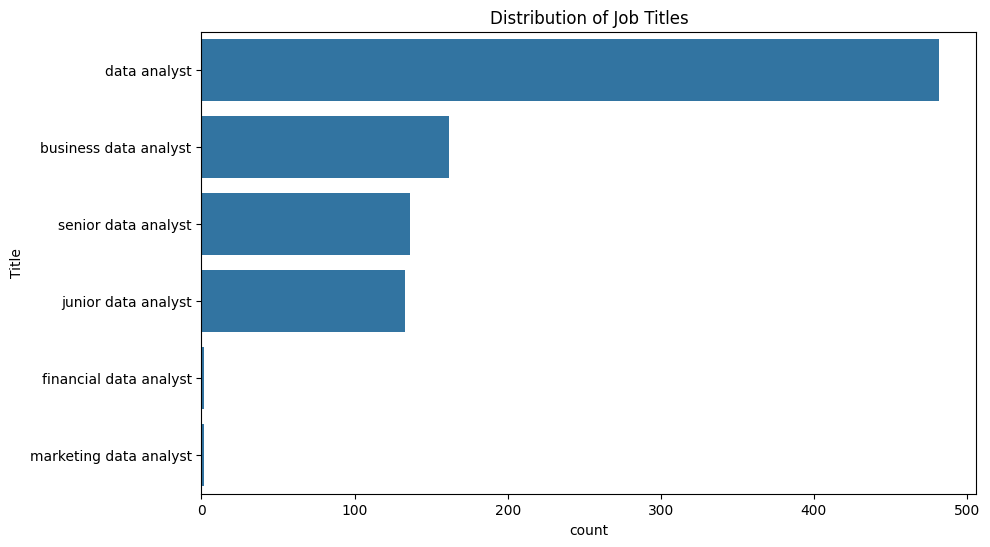

In [11]:
# Distribution of job titles
plt.figure(figsize=(10, 6))
sns.countplot(y='Title', data=df, order=df['Title'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.show()

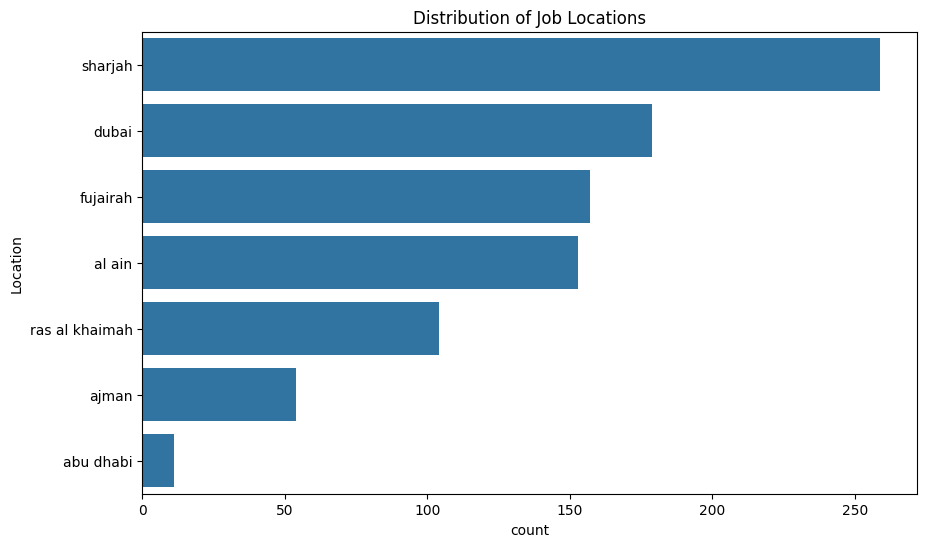

In [12]:
# Distribution of locations
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Distribution of Job Locations')
plt.show()

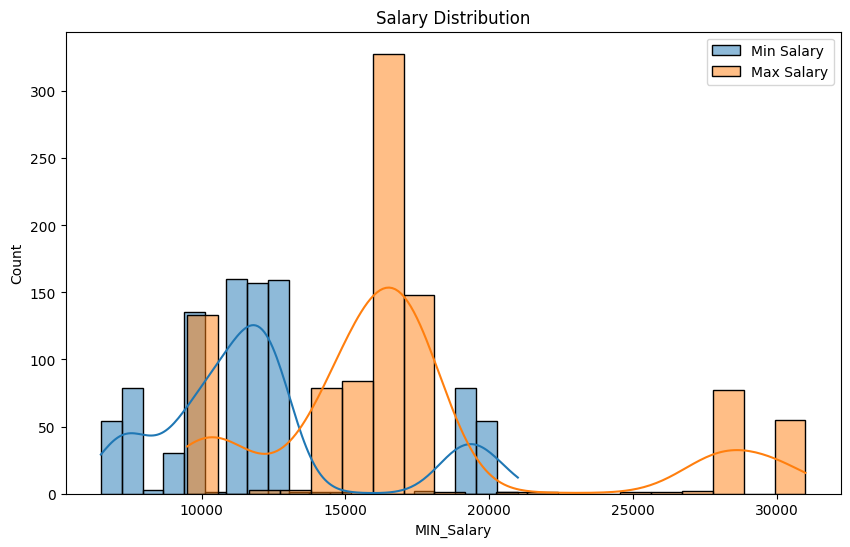

In [13]:
# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MIN_Salary'], bins=20, kde=True, label='Min Salary')
sns.histplot(df['MAX_Salary'], bins=20, kde=True, label='Max Salary')
plt.title('Salary Distribution')
plt.legend()
plt.show()

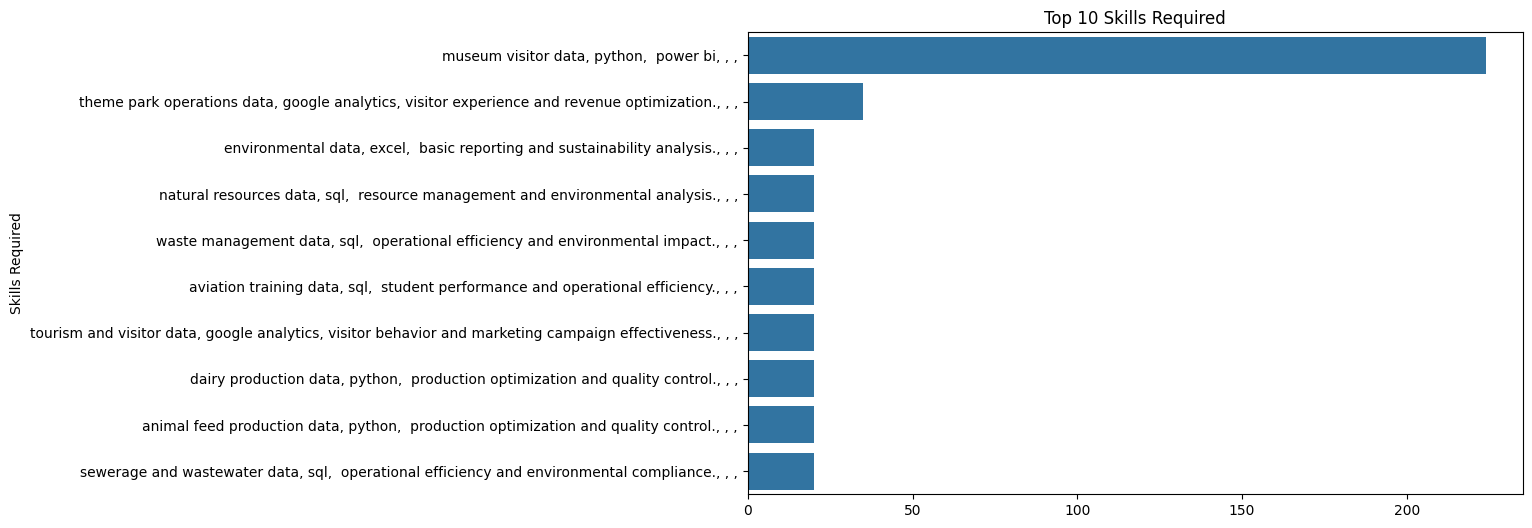

In [14]:
# Top skills required
top_skills = df['Skills Required'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Top 10 Skills Required')
plt.show()

In [15]:
# 4. Define the skills to extract
skills_to_extract = ['python', 'power bi', 'tableau', 'reporting', 'dashboard', 'sql', 'visualization', 'excel', 'data analysis', 'crm', 'google analytics']

# 5. Extract the skills
def extract_skills(skills_list):
  if isinstance(skills_list, str):
    skills = [skill.strip() for skill in skills_list.split(',')]
    return [skill for skill in skills if skill in skills_to_extract]
  else:
    return []

df['Extracted Skills'] = df['Skills Required'].apply(extract_skills)

# 6. Display the result
df[['Title', 'Company', 'Extracted Skills']].head()

,Title,Company,Extracted Skills
0,data analyst,etisalat,"[sql, python, tableau, data analysis, reporting]"
1,senior data analyst,emirates airlines,[power bi]
2,business data analyst,noon.com,"[excel, sql, google analytics]"
3,financial data analyst,first abu dhabi bank (fab),[sql]
4,marketing data analyst,careem,[sql]


In [16]:
df.head()

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,Skills Required,Extracted Skills
0,data analyst,etisalat,abu dhabi,3,10000,15000,"sql, python, tableau, data analysis, report...","[sql, python, tableau, data analysis, reporting]"
1,senior data analyst,emirates airlines,dubai,5,18000,25000,"advanced sql, r, power bi, predictive modeli...",[power bi]
2,business data analyst,noon.com,dubai,2,8000,12000,"excel, sql, google analytics, e-commerce dat...","[excel, sql, google analytics]"
3,financial data analyst,first abu dhabi bank (fab),abu dhabi,4,15000,22000,"financial modeling, sql, sas, risk analysis,...",[sql]
4,marketing data analyst,careem,dubai,2,9000,14000,"marketing analytics, sql, crm tools, campaig...",[sql]


In [17]:
# Save the DataFrame to an Excel file
df.to_excel('cleaned_dataset.xlsx', index=False)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
